In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import math

#2. Contrast Adjustment

In [4]:
def hist(image):
	m, n = image.shape
	hist = [0.0] * 256
	for i in range(m):
		for j in range(n):
			hist[image[i, j]]+=1
	return np.array(hist)/(m*n)
 

def cdf(hist):
	return [sum(hist[:i+1]) for i in range(len(hist))]


def histeq(image):
	h = hist(image)
	cumsum = np.array(cdf(h))
	sk = np.uint8(255 * cumsum)
	s1, s2 = image.shape
	new_img = np.zeros_like(image)
	# applying transfered values for each pixels
	for i in range(0, s1):
		for j in range(0, s2):
			new_img[i, j] = sk[image[i, j]]
	Hist = hist(new_img)
	#return transformed image, original and new histogram, 
	# and transform function
	return new_img , Hist

##2.1. Histogram Equalization

###2.1.1 illustrate the histogram as a stem plot

In [3]:
camera_man = cv2.imread('/content/sample_data/Camera Man.bmp', cv2.IMREAD_GRAYSCALE)

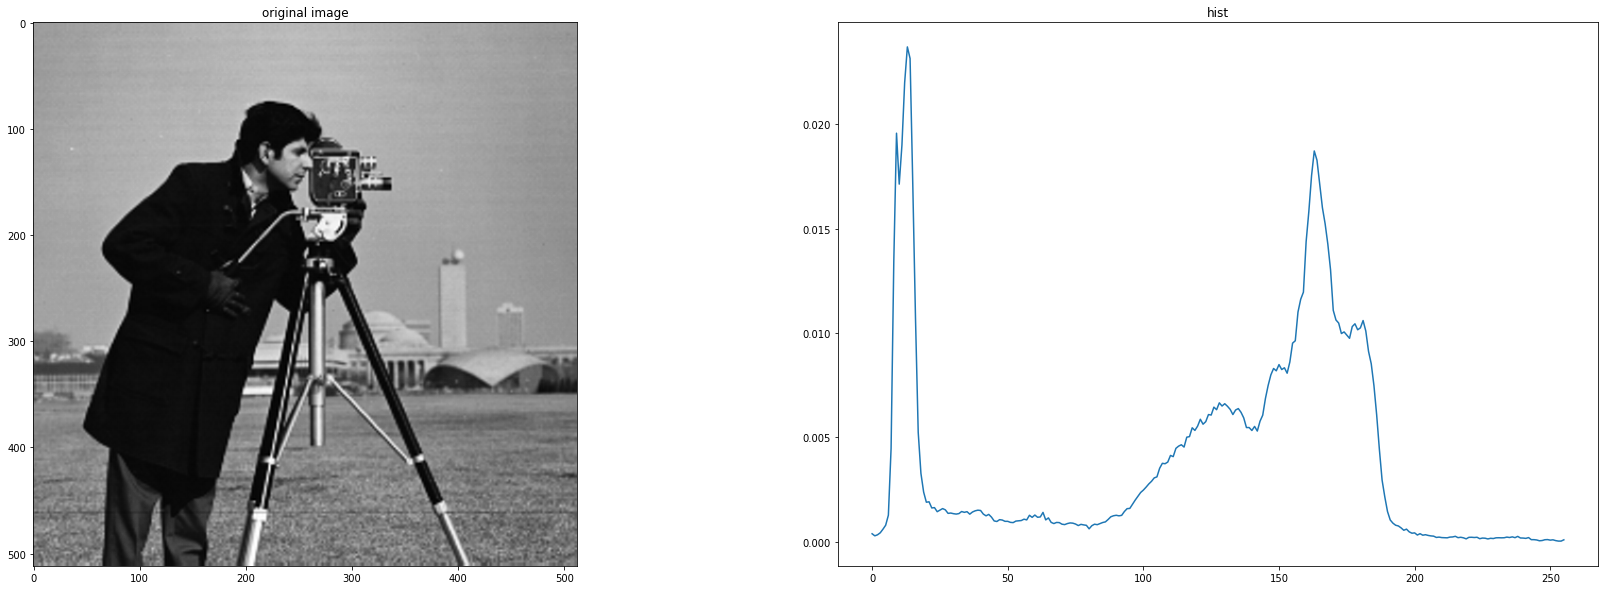

In [36]:
 plt.figure(figsize=(30,10))

plt.subplot(121)
plt.imshow(camera_man)
plt.title('original image')

orghist = hist(np.uint8(camera_man))

plt.subplot(122)
plt.plot(orghist)
plt.title('hist')
plt.set_cmap('gray')

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


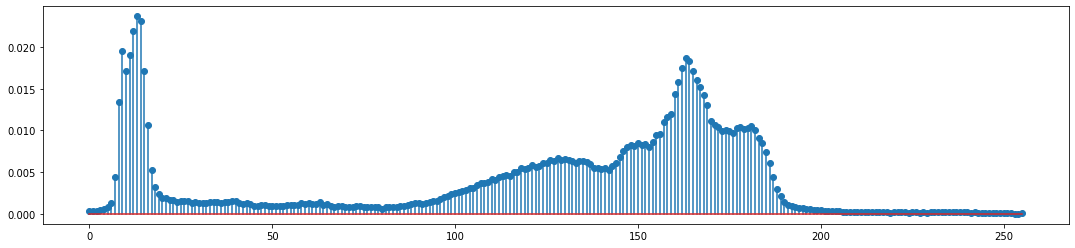

In [ ]:
plt.subplot(111)
plt.stem(orghist)
plt.subplots_adjust(right=2.5, wspace=0.1)
plt.show()

####2.1.1.1. Decrease the brightness of Camera Man by dividing the intensity values by 3 and named output as D.

In [12]:
D = camera_man//3

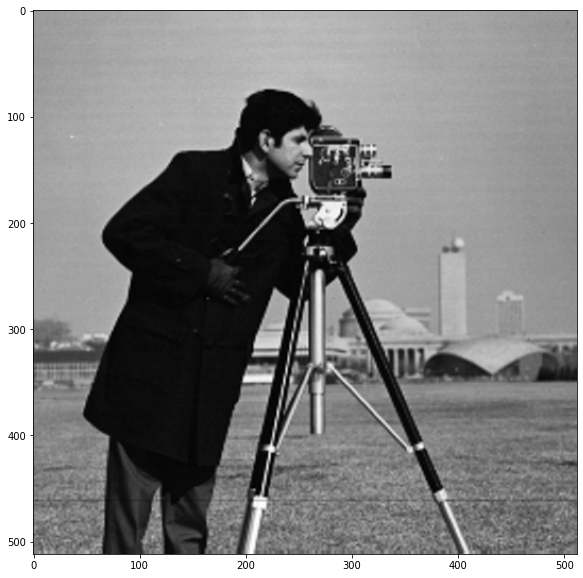

In [14]:
plt.figure(figsize=(10,10))
plt.imshow(D)

####2.1.1.2. Plot the histograms of Input and D. *What can you observe from these two histograms?*

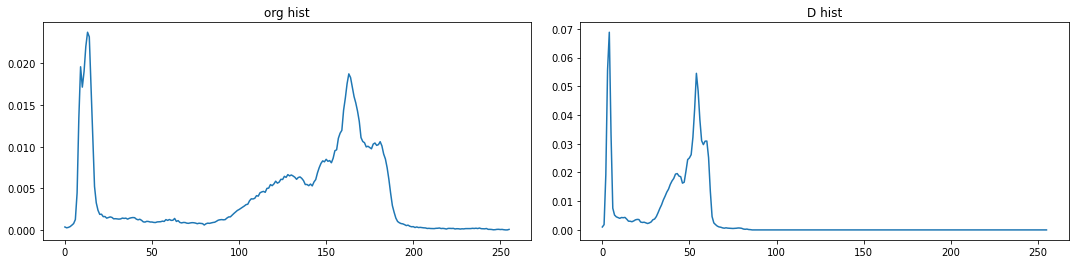

In [15]:
plt.subplot(121)
plt.title('org hist')
plt.plot(orghist)

dhist = hist(np.uint8(D))

plt.subplot(122)
plt.plot(dhist)
plt.title('D hist')
plt.subplots_adjust(right=2.5, wspace=0.1)

plt.show()

####2.1.1.3. histeq on D

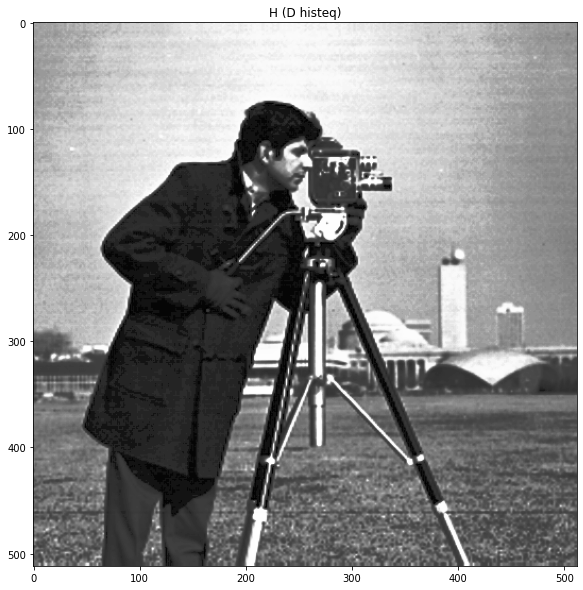

In [39]:
H, dhisteq = histeq(np.uint8(D))

plt.figure(figsize=(10,10))
plt.imshow(H)
plt.title('H (D histeq)')

plt.show()

####2.1.1.4 local histeq on D

In [18]:
def AHE(im, tile_x=8, tile_y=8):        
    h, w = im.shape
    out = np.zeros(im.shape) # Declare output variable

    for i in range(0, h):
        for j in range(0, w):
            # Get the block
            blk = im[i: min(i + tile_x, h), j: min(j + tile_y, w)]
            probs = get_distr(blk)
            out[i: min(i + tile_x, h), j: min(j + tile_y, w)] = CHE(blk, probs)
    return out

def CHE(im, probs):
    T = np.array(list(map(int, 255*np.cumsum(probs))))
    return T[im]

def get_distr(im):
   hist, _ = np.histogram(im.flatten(),256,[0,256])
   return hist / hist.sum()

In [19]:
L = AHE(D,100,100)

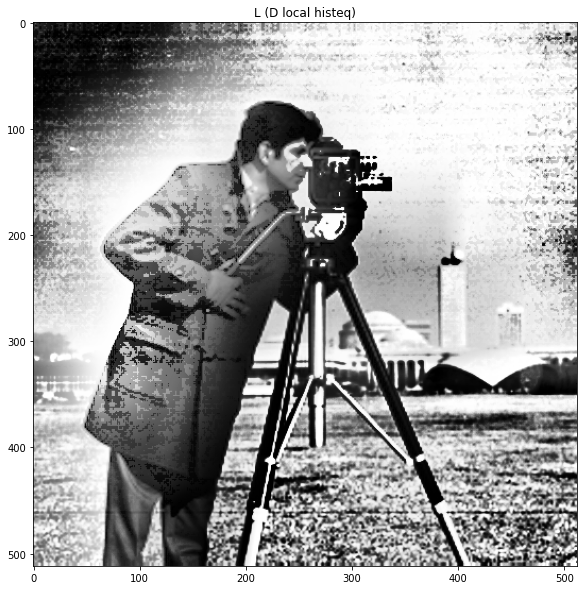

In [40]:
plt.figure(figsize=(10,10))
plt.imshow(L)
plt.title('L (D local histeq)')

plt.show()

####2.1.1.5 H and L hists. *What’s the main difference between local and global histogram equalization?*

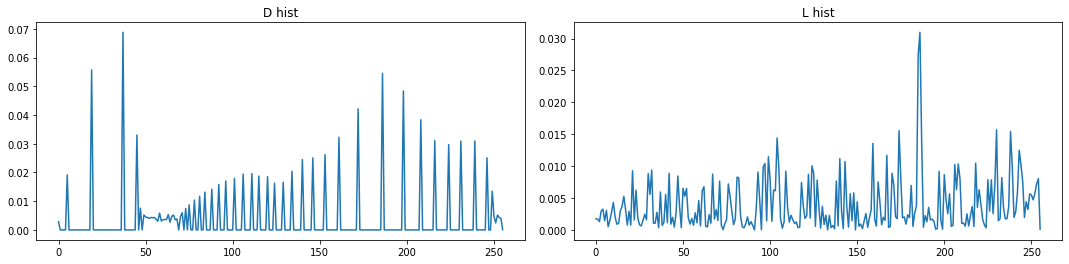

In [ ]:
plt.figure(figsize=(10,25))

plt.subplot(121)
plt.title('D hist')
plt.plot(dhisteq)

Lhist = hist(np.uint8(L))

plt.subplot(122)
plt.plot(Lhist)
plt.title('L hist')
plt.subplots_adjust(right=2.5, wspace=0.1)

plt.show()

####2.1.1.6 enhance D by performing log transform, inverse log transform and power-law transform. *adjust the parameters to obtain the results as best as you can. Show the parameters, resultant images and corresponding histograms. Provide some discussions on the results as well.*

In [52]:
def log_transform(c, f):
    g = c * math.log(float(1 + f),10)
    return g
 
def log_transform_image(img, outputMax = 255, inputMax=255):
    c = outputMax/math.log(inputMax+1,10);
    s = np.zeros(img.shape)
    for i in range(0, img.shape[0]-1):
        for j in range(0, img.shape[1]-1):
            f = img[i,j]
            pixel = round(log_transform(c, f))
            s[i,j]=pixel
    return s

In [51]:
def inverse_log_transform(c, f):
    p = float(f / c) 
    g = 10**p
    return float(g-1)
 
def inverse_log_transform_image(img, outputMax = 255, inputMax=255):
    c = outputMax/math.log(inputMax+1,10);
    s = np.zeros(img.shape)
    for i in range(0, img.shape[0]-1):
        for j in range(0, img.shape[1]-1):
            f = img[i,j]
            pixel = round(inverse_log_transform(c, f))
            s[i,j]=pixel
    return s

In [50]:
def gamma_transform(c, f, gamma):
    g = float(f)**gamma
    return g*c

def gamma_transform_image(img, gamma, outputMax = 255, inputMax=255):
    c = outputMax/math.log(inputMax+1,10);
    s = np.zeros(img.shape)
    for i in range(0, img.shape[0]-1):
        for j in range(0, img.shape[1]-1):
            f = img[i,j]
            pixel = round(gamma_transform(c, f, gamma))
            s[i,j]=pixel
    return s

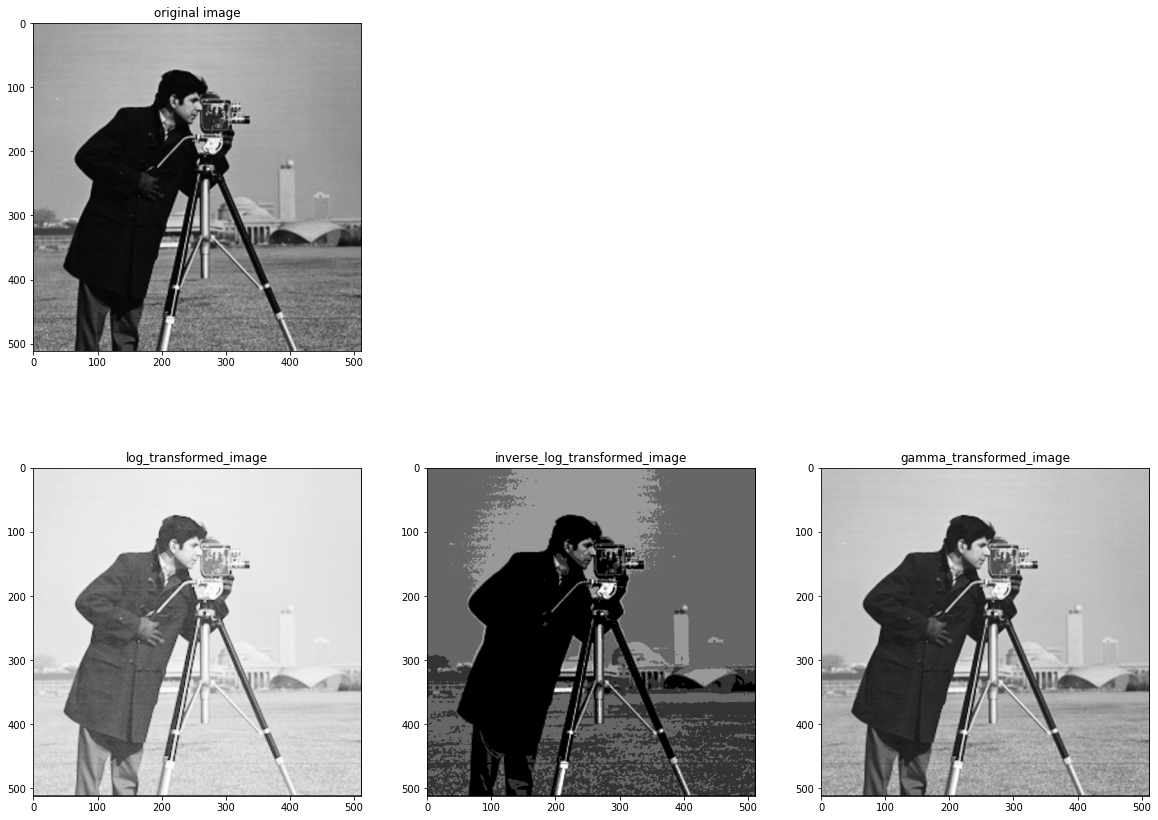

In [54]:
plt.figure(figsize=(20,15))

log_transformed_image = log_transform_image(D)
inverse_log_transformed_image = inverse_log_transform_image(D)
gamma_transformed_image = gamma_transform_image(D,0.6)

plt.subplot(231)
plt.imshow(D)
plt.title('original image')

plt.subplot(234)
plt.imshow(log_transformed_image)
plt.title('log_transformed_image')
plt.set_cmap('gray')

plt.subplot(235)
plt.imshow(inverse_log_transformed_image)
plt.title('inverse_log_transformed_image')

plt.subplot(236)
plt.imshow(gamma_transformed_image)
plt.title('gamma_transformed_image')

plt.show()

###2.1.2. histeq

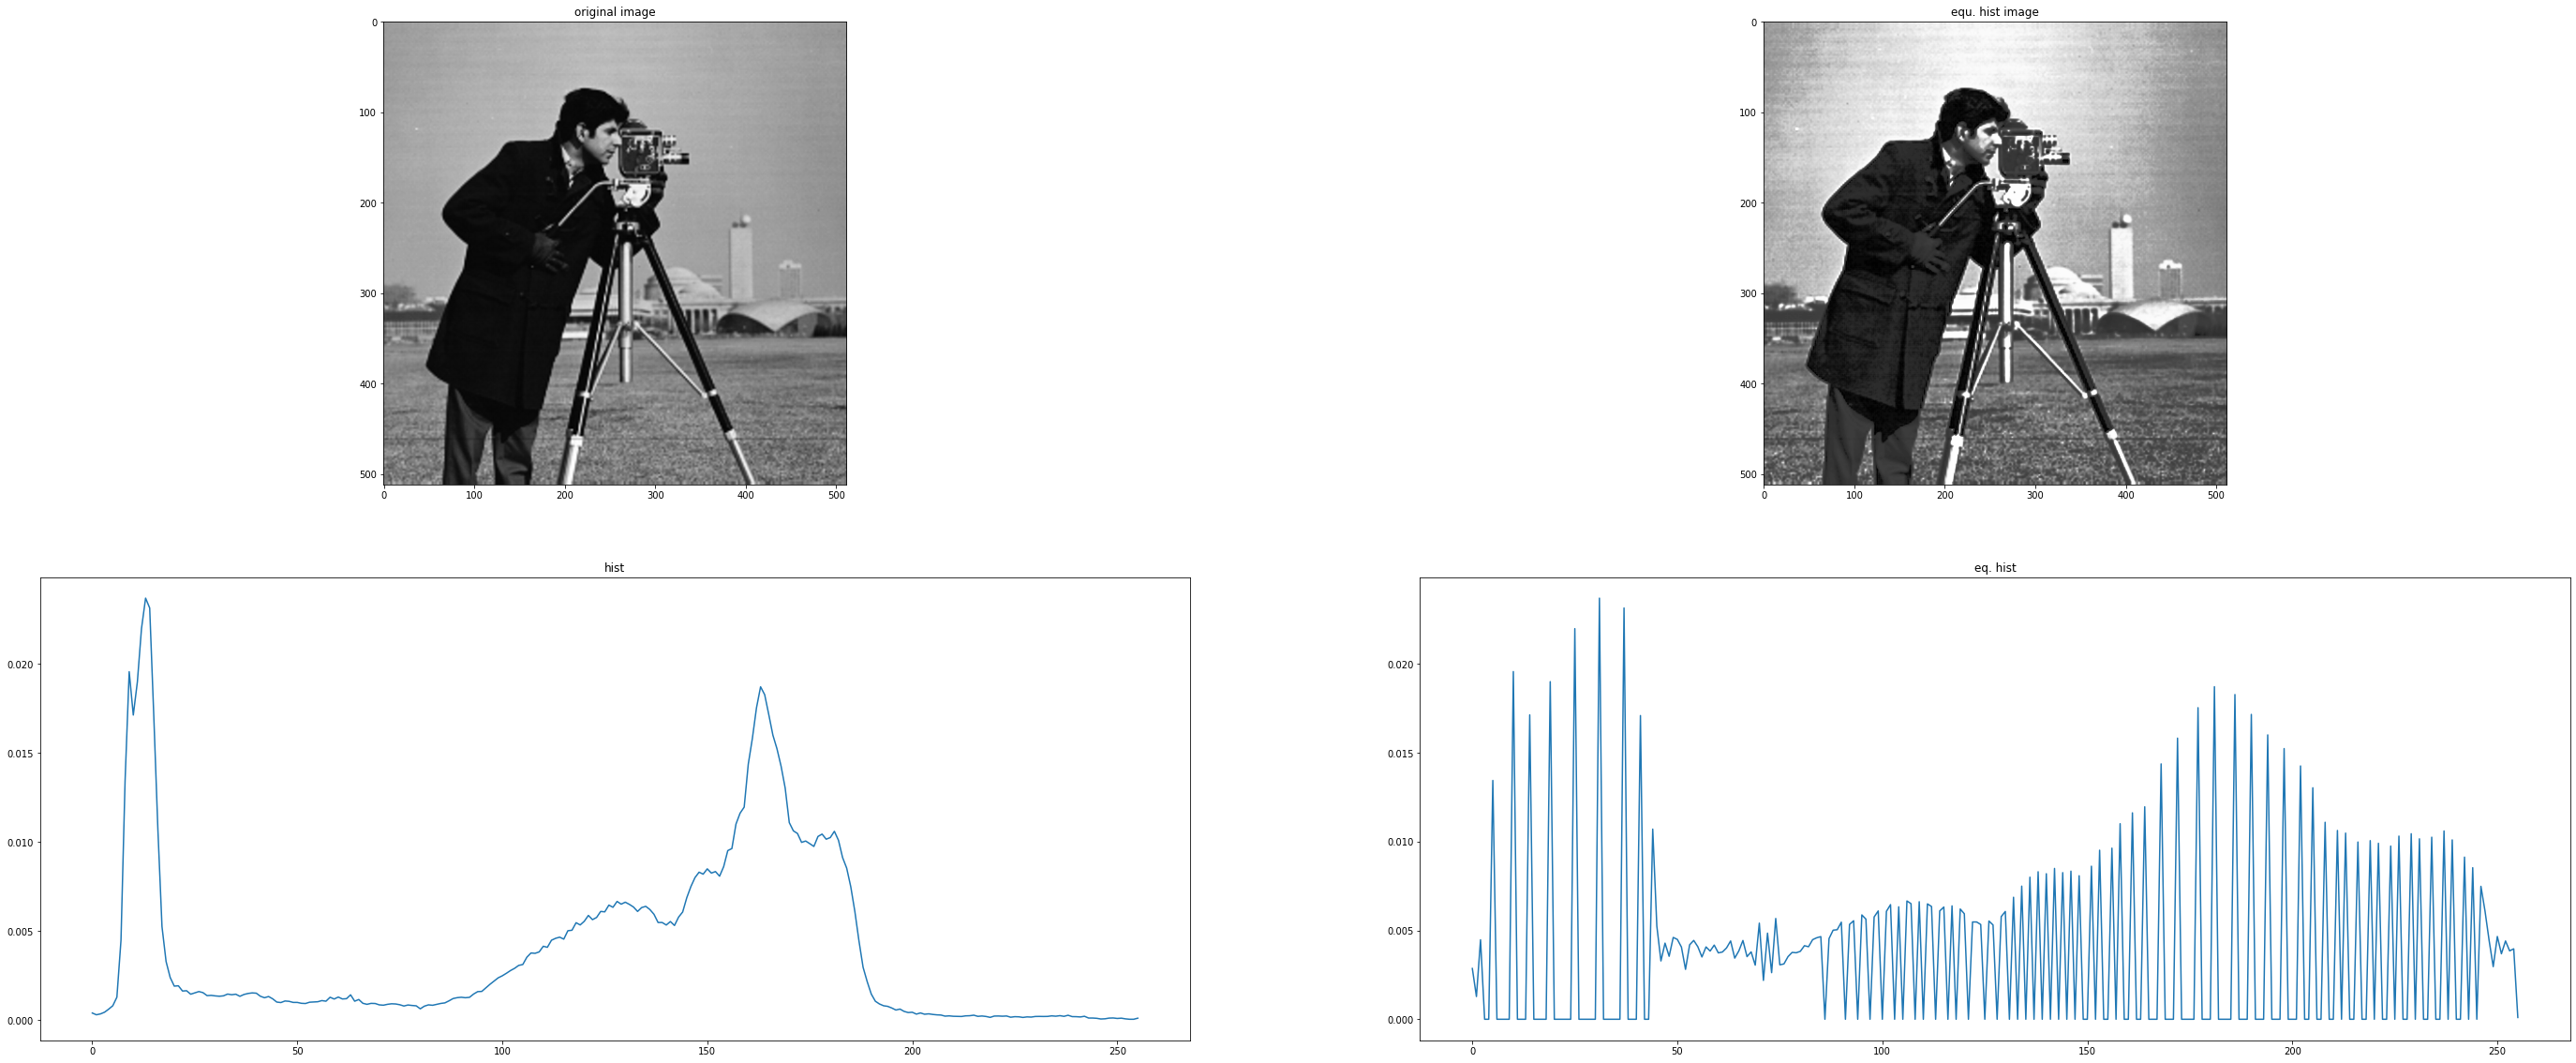

In [55]:
orghist = hist(np.uint8(camera_man))
equimg, ehist = histeq(camera_man)
plt.figure(figsize=(20,20))
plt.subplots_adjust(right=2, wspace=0.1)

plt.subplot(221)
plt.title('original image')
plt.imshow(camera_man)

plt.subplot(222)
plt.title('equ. hist image')
plt.imshow(equimg)


plt.subplot(223)
plt.title('hist')
plt.plot(orghist)

plt.subplot(224)
plt.title('eq. hist')
plt.plot(ehist)

plt.show()

###2.1.3 *What is the difference between histeq and imadjust functions in Matlab? Play with these functions with various input parameters for Camera Man image. Write down your observations in your report and display results.*

##2.2 LHE

In [56]:
he1 = cv2.imread('/content/sample_data/HE1.jpg', cv2.IMREAD_GRAYSCALE)
he2 = cv2.imread('/content/sample_data/HE2.jpg', cv2.IMREAD_GRAYSCALE)
he3 = cv2.imread('/content/sample_data/HE3.jpg', cv2.IMREAD_GRAYSCALE)
he4 = cv2.imread('/content/sample_data/HE4.jpg', cv2.IMREAD_GRAYSCALE)

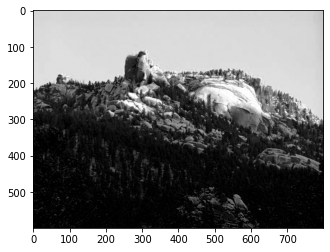

In [ ]:
plt.imshow(he1, cmap='gray')

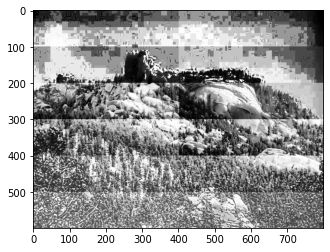

In [ ]:
lhe1=AHE(he1,100,400)
plt.imshow(lhe1,cmap='gray')

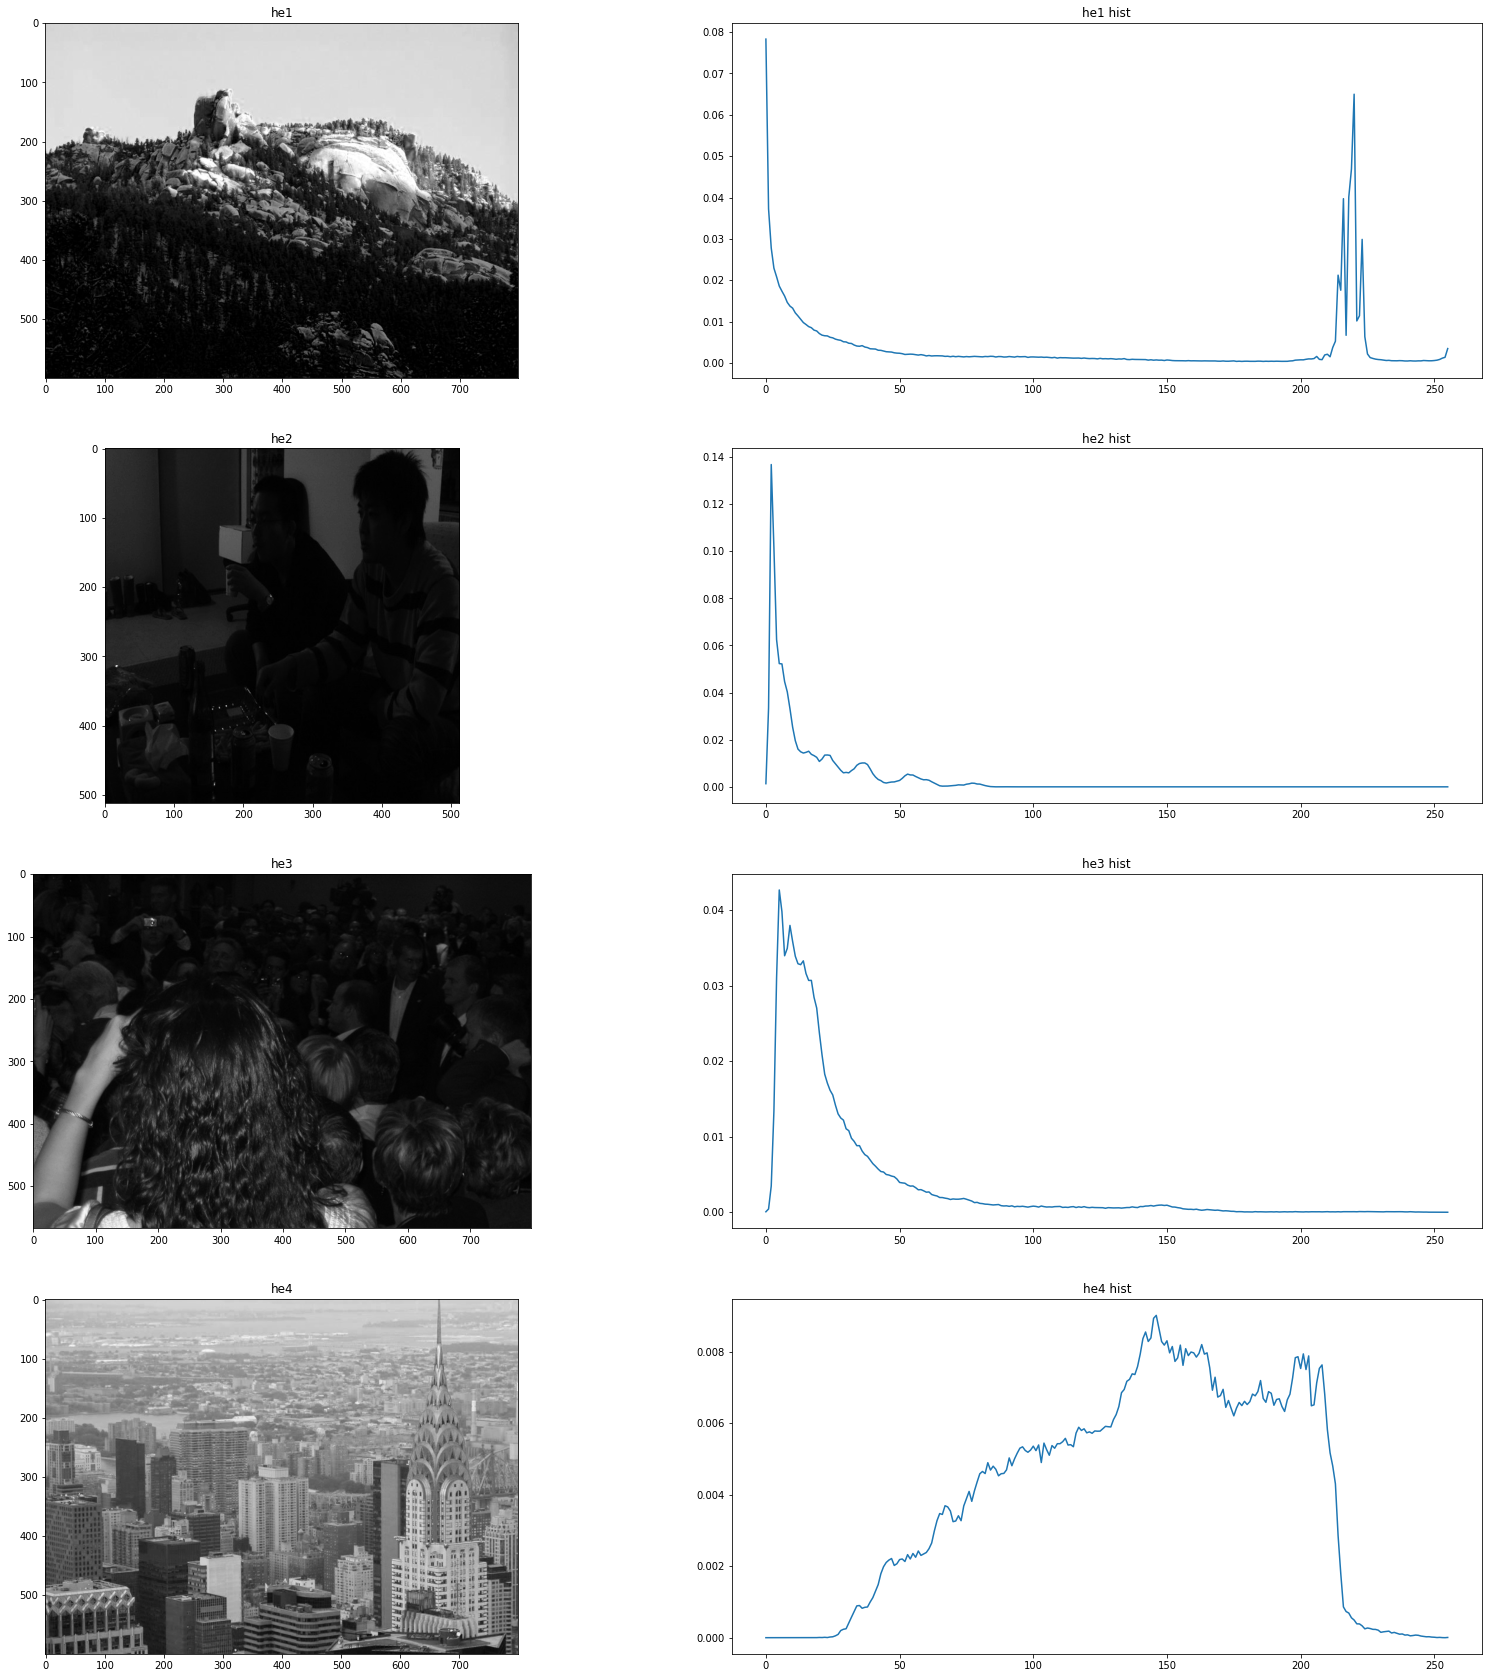

In [ ]:
plt.figure(figsize=(25,30))
plt.subplots_adjust(right=1, wspace=0.1)

he1hist = hist(np.uint8(he1))
he2hist = hist(np.uint8(he2))
he3hist = hist(np.uint8(he3))
he4hist = hist(np.uint8(he4))


plt.subplot(421)
plt.title('he1')
plt.imshow(he1)

plt.subplot(422)
plt.title('he1 hist')
plt.plot(he1hist)



plt.subplot(423)
plt.title('he2')
plt.imshow(he2)

plt.subplot(424)
plt.title('he2 hist')
plt.plot(he2hist)



plt.subplot(425)
plt.title('he3')
plt.imshow(he3)

plt.subplot(426)
plt.title('he3 hist')
plt.plot(he3hist)



plt.subplot(427)
plt.title('he4')
plt.imshow(he4)

plt.subplot(428)
plt.title('he4 hist')
plt.plot(he4hist)

plt.show()

In [ ]:
lhe1=AHE(he1,100,400)
lhe2=AHE(he2,100,400)
lhe3=AHE(he3,100,400)
lhe4=AHE(he4,100,400)

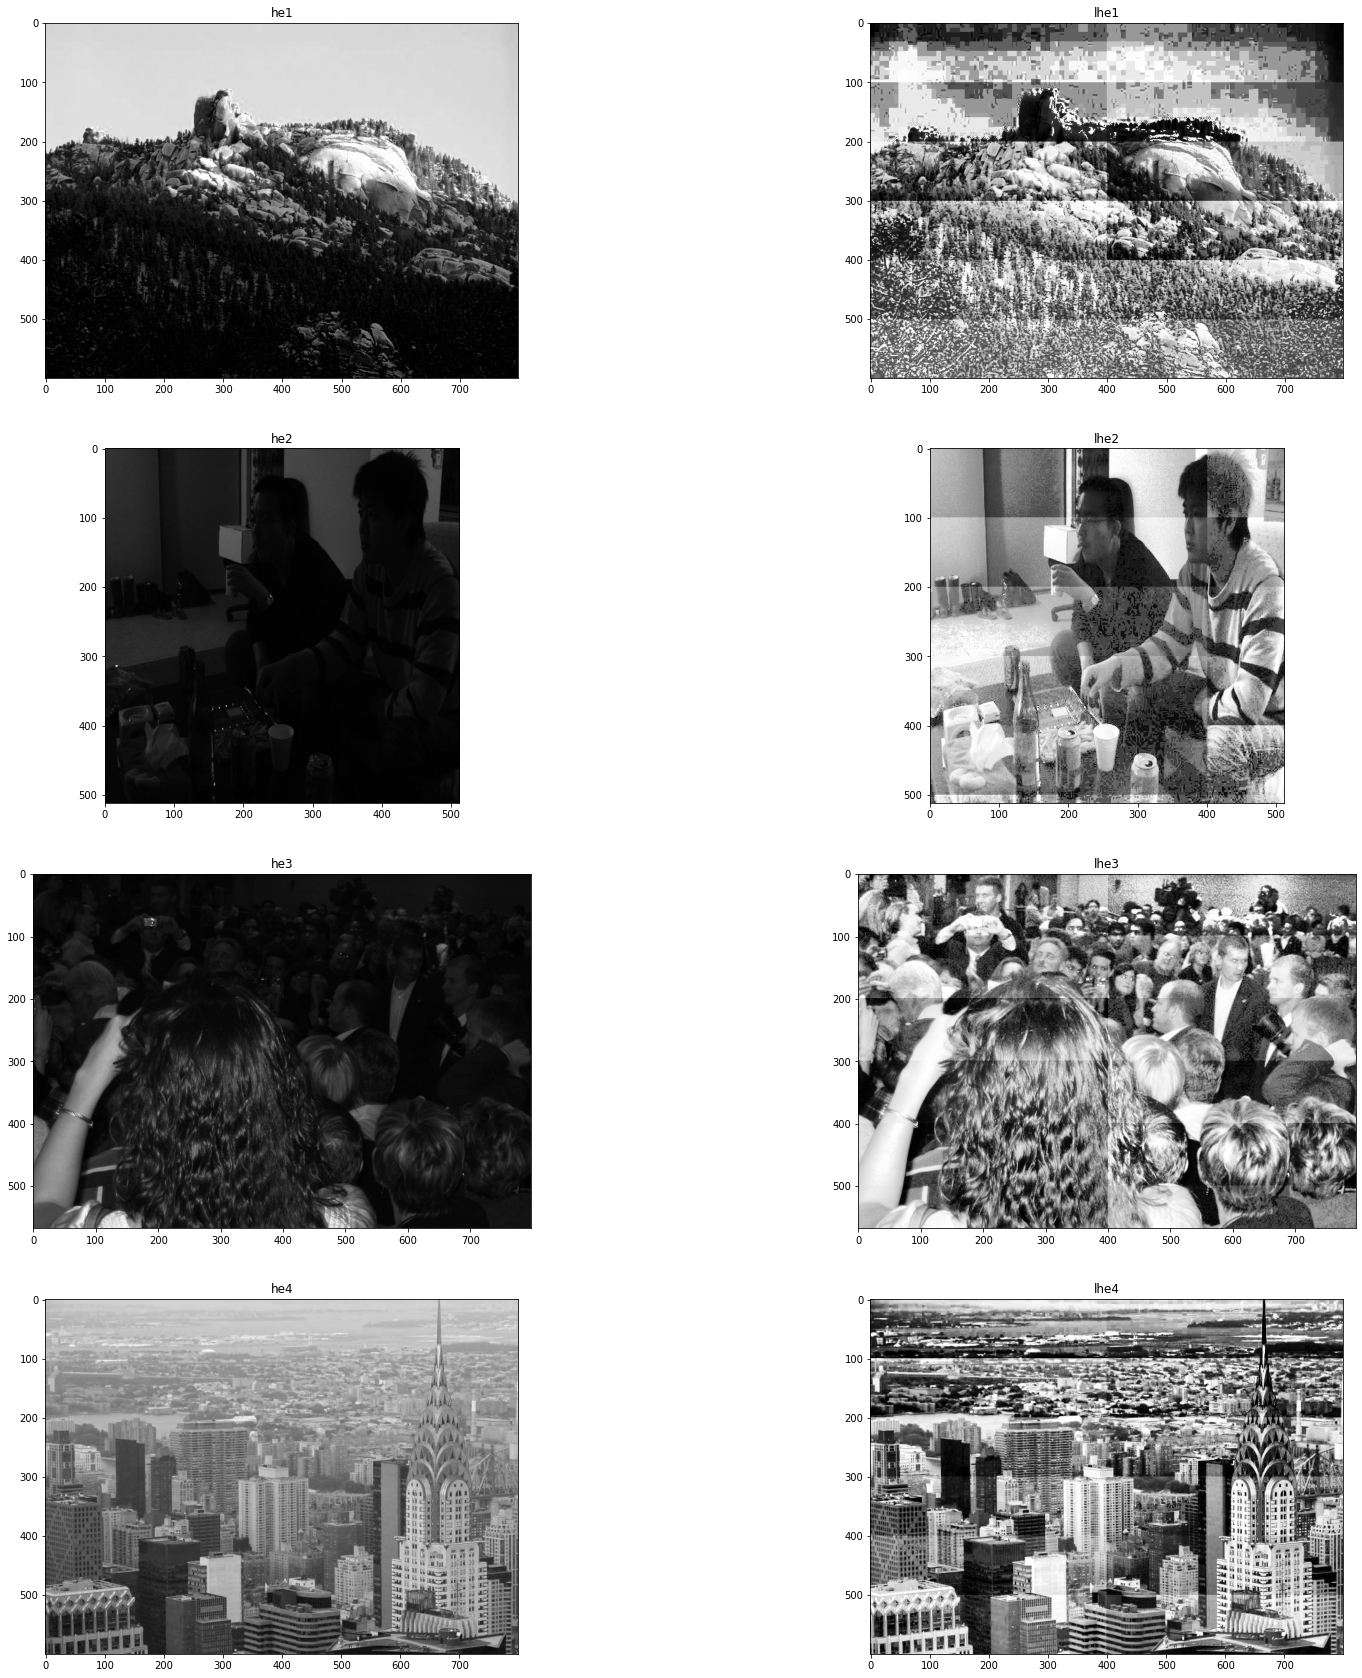

In [ ]:
plt.figure(figsize=(25,30))
plt.subplots_adjust(right=1, wspace=0.1)

plt.subplot(421)
plt.title('he1')
plt.imshow(he1)

plt.subplot(422)
plt.title('lhe1')
plt.imshow(lhe1,cmap='gray')



plt.subplot(423)
plt.title('he2')
plt.imshow(he2)

plt.subplot(424)
plt.title('lhe2')
plt.imshow(lhe2,cmap='gray')



plt.subplot(425)
plt.title('he3')
plt.imshow(he3)

plt.subplot(426)
plt.title('lhe3')
plt.imshow(lhe3,cmap='gray')



plt.subplot(427)
plt.title('he4')
plt.imshow(he4)

plt.subplot(428)
plt.title('lhe4')
plt.imshow(lhe4,cmap='gray')

plt.show()

In [ ]:
lhe1hist = hist(np.uint8(lhe1))
lhe2hist = hist(np.uint8(lhe2))
lhe3hist = hist(np.uint8(lhe3))
lhe4hist = hist(np.uint8(lhe4))

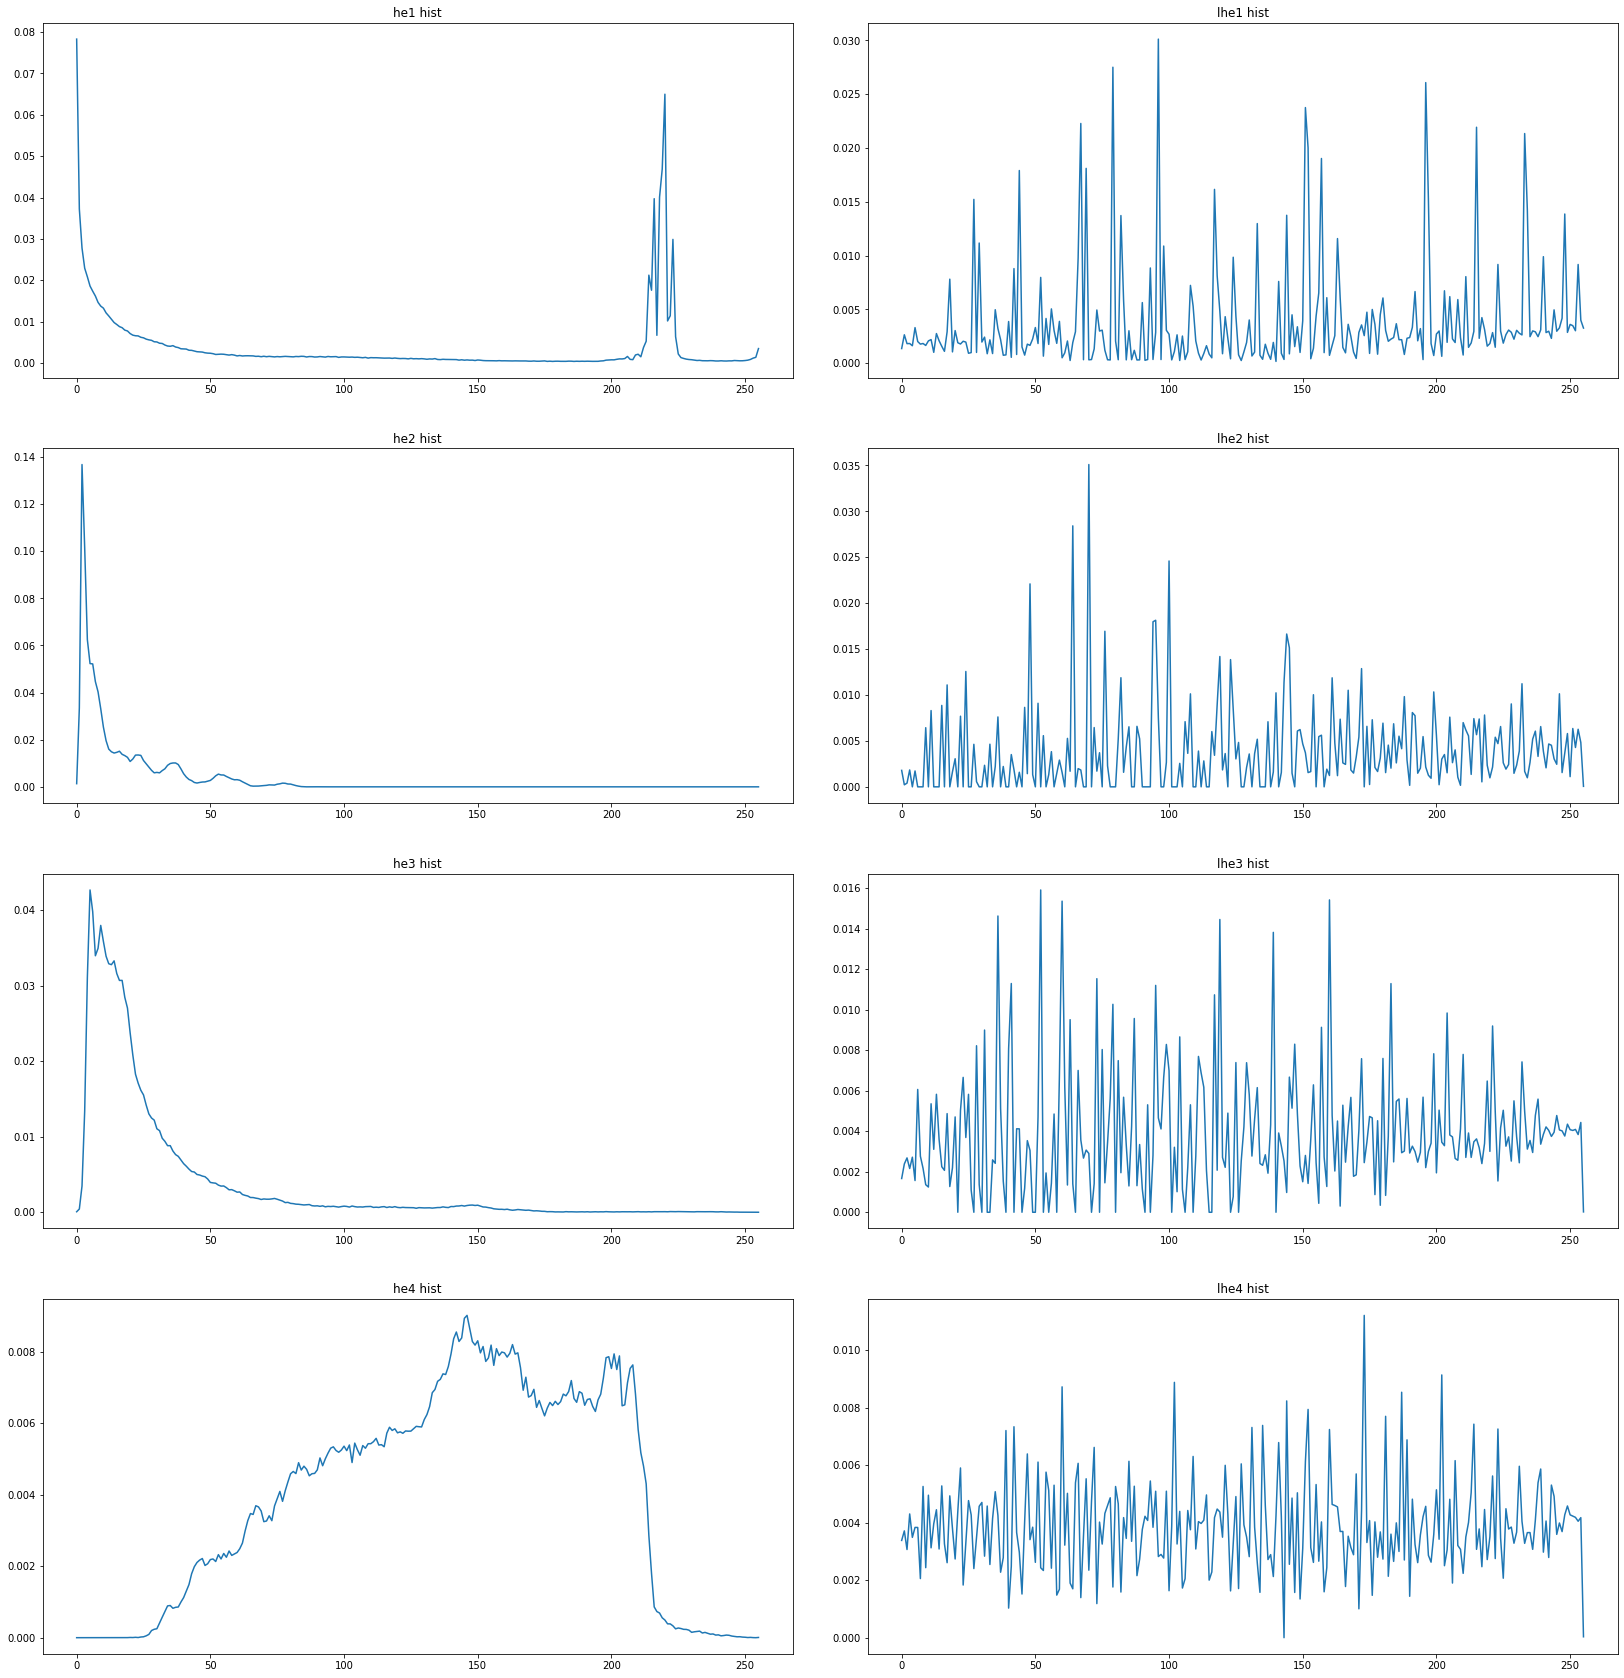

In [ ]:
plt.figure(figsize=(25,30))
plt.subplots_adjust(right=1, wspace=0.1)

plt.subplot(421)
plt.title('he1 hist')
plt.plot(he1hist)

plt.subplot(422)
plt.title('lhe1 hist')
plt.plot(lhe1hist)



plt.subplot(423)
plt.title('he2 hist')
plt.plot(he2hist)

plt.subplot(424)
plt.title('lhe2 hist')
plt.plot(lhe2hist)



plt.subplot(425)
plt.title('he3 hist')
plt.plot(he3hist)

plt.subplot(426)
plt.title('lhe3 hist')
plt.plot(lhe3hist)



plt.subplot(427)
plt.title('he4 hist')
plt.plot(he4hist)

plt.subplot(428)
plt.title('lhe4 hist')
plt.plot(lhe4hist)

plt.show()

#3. etc

In [ ]:
def lhe(Img,M=10,N=20):
  mid_val=(M*N)//2

  inn=0;
  for i in range(0,M):
    for j in range (0,N):
        inn=inn+1
        if(inn==mid_val):
            PadM=i-1;
            PadN=j-1;
            break

  B=addpadding(Img,PadM,PadN);

  for i in range( 0, B.shape[0]-((PadM*2)+1)):
    for j in range(0, B.shape[1]-((PadN*2)+1)):
        cdf=np.zeros(256);
        inc=1;
        for x in range(0,M):
            for y in range (0,N):
  #FIND THE MIDDLE ELEMENT IN THE WINDOW          
                if(inc==mid_val):
                    ele=B[i+x-1,j+y-1];
                pos=B[i+x-1,j+y-1]+1;
                cdf[pos-1]=cdf[pos-1]+1;
                inc=inc+1;

                      
        #COMPUTE THE CDF FOR THE VALUES IN THE WINDOW
        for l in range(1,255):
            cdf[l]=cdf[l]+cdf[l-1]
        Img[i,j]=cdf[ele] // (M*N)*255
  return Img


In [ ]:
a = np.array([[2,1,0],
             [0,1,3],
             [4,1,4]])
a

array([[2, 1, 0],
       [0, 1, 3],
       [4, 1, 4]])

In [ ]:
a2=addpadding(a,1)
a2

array([[0, 0, 0, 0, 0],
       [0, 2, 1, 0, 0],
       [0, 0, 1, 3, 0],
       [0, 4, 1, 4, 0],
       [0, 0, 0, 0, 0]], dtype=uint8)

In [ ]:
def addpadding(source,pad):
    imarr = np.array(source)
    padimarr = np.zeros((imarr.shape[0]+2*pad,imarr.shape[1]+2*pad),dtype=np.uint8)
    padimarr[pad:padimarr.shape[0]-pad,pad:padimarr.shape[1]-pad]=imarr
    return padimarr

In [ ]:
def pdf(x):
	m, n = x.shape
	h = [0.0] * 256
	for i in range(m):
		for j in range(n):
			h[x[i, j]]+=1
	return np.array(h)/(m*n)

In [ ]:
def cumsum(x):
  return [sum(pdf(x[:i+1])) for i in range(len(x))]

In [ ]:
for i in range(len(a)):
  print(i)
  print(pdf(a[:i+1]))

0
[0.         0.33333333 0.33333333 0.33333333 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.       

In [ ]:
a = np.array([[1,2,3],
             [4,5,6],
             [7,8,9]])
a

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [ ]:
a2 = addpadding(a,1)
a2

array([[0, 0, 0, 0, 0],
       [0, 1, 2, 3, 0],
       [0, 4, 5, 6, 0],
       [0, 7, 8, 9, 0],
       [0, 0, 0, 0, 0]], dtype=uint8)

In [ ]:
sl = get_slices(a2, 3,3)
sl

array([[[0, 0, 0],
        [0, 1, 2],
        [0, 4, 5]],

       [[0, 0, 0],
        [1, 2, 3],
        [4, 5, 6]],

       [[0, 0, 0],
        [2, 3, 0],
        [5, 6, 0]],

       [[0, 1, 2],
        [0, 4, 5],
        [0, 7, 8]],

       [[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]],

       [[2, 3, 0],
        [5, 6, 0],
        [8, 9, 0]],

       [[0, 4, 5],
        [0, 7, 8],
        [0, 0, 0]],

       [[4, 5, 6],
        [7, 8, 9],
        [0, 0, 0]],

       [[5, 6, 0],
        [8, 9, 0],
        [0, 0, 0]]], dtype=uint8)

In [ ]:
sl[4]

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]], dtype=uint8)

In [ ]:
h = pdf(sl[0])
h

array([0.55555556, 0.11111111, 0.11111111, 0.        , 0.11111111,
       0.11111111, 0.        , 0.        , 0.        ])

In [ ]:
h = pdf(sl[0])
cumsum = np.array(cdf(h))
cumsum

array([0.55555556, 0.66666667, 0.77777778, 0.77777778, 0.88888889,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     